# Part II - Prosper Loan Data Exploration
## by  Isaac  Godwin

## Investigation Overview

   For the presentation, my aims is to focus on the process of exploring the individual variable of interest to discover the relationship between the borrowers and the loan borrowed.

   The variable of interest will be introduced, and then examine how they relate to each another and eventually how their correlation is affected by another variable. The variables include the following; Borrowers' employment status, their income range, stated monthly income and the loan original amount.


## Dataset Overview
   The dataset used for this project is the Prosper loan Dataset, which was provided by Udacity. the data contains 113,937 observations with 81 variables.

   For the purpose of these analysis, a subset dataset was created having only 16 variables of interest.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan_df = pd.read_csv('prosperloandata.csv')

In [3]:
# subseting the data frame by selecting variable of interest
col = ['EmploymentStatus', 'Occupation', 'StatedMonthlyIncome','BorrowerState',  'BorrowerAPR', 'BorrowerRate', 'LoanStatus',
        'IncomeVerifiable', 'DebtToIncomeRatio', 'IsBorrowerHomeowner', 'LoanOriginalAmount', 'IncomeRange', 'LoanOriginationDate',
       'ProsperRating (Alpha)', 'Term','TotalProsperLoans']
loan_subset = loan_df[col]
loan_subset.head()

,EmploymentStatus,Occupation,StatedMonthlyIncome,BorrowerState,BorrowerAPR,BorrowerRate,LoanStatus,IncomeVerifiable,DebtToIncomeRatio,IsBorrowerHomeowner,LoanOriginalAmount,IncomeRange,LoanOriginationDate,ProsperRating (Alpha),Term,TotalProsperLoans
0,Self-employed,Other,3083.333333,CO,0.16516,0.1580,Completed,True,0.17,True,9425,"$25,000-49,999",2007-09-12 00:00:00,NaN,36,NaN
1,Employed,Professional,6125.000000,CO,0.12016,0.0920,Current,True,0.18,False,10000,"$50,000-74,999",2014-03-03 00:00:00,A,36,NaN
2,Not available,Other,2083.333333,GA,0.28269,0.2750,Completed,True,0.06,False,3001,Not displayed,2007-01-17 00:00:00,NaN,36,NaN
3,Employed,Skilled Labor,2875.000000,GA,0.12528,0.0974,Current,True,0.15,True,10000,"$25,000-49,999",2012-11-01 00:00:00,A,36,NaN
4,Employed,Executive,9583.333333,MN,0.24614,0.2085,Current,True,0.26,True,15000,"$100,000+",2013-09-20 00:00:00,D,36,1.0


## Distribution of Employment status
To gain insights into the borrowers, the distribution of the borrower's employment status shows that the vast majority of the borrowers identify as employed and fultime.

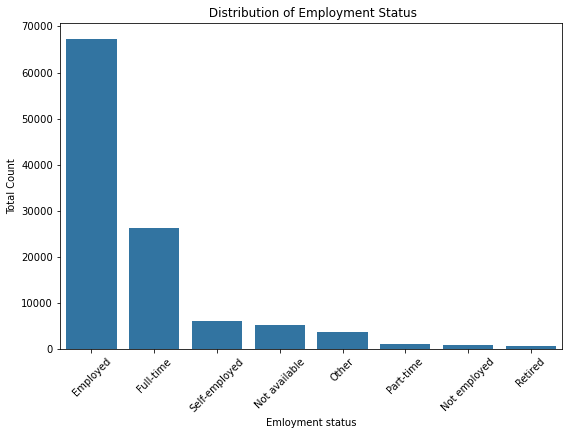

In [4]:
#checking the Borrower's employment status
plt.figure(figsize = [9, 6])
color_pal = sb.color_palette()[0]
employ = loan_subset['EmploymentStatus'].value_counts().index
sb.countplot(data= loan_subset, x= 'EmploymentStatus', color = color_pal, order = employ)
plt.title(" Distribution of Employment Status")
plt.xlabel('Emloyment status')
plt.ylabel('Total Count')
plt.xticks(rotation = 45);

## Distribution of Income Range
The distribution indicated that Most of the borrowers have income between the range of ($)25,000-74,999.

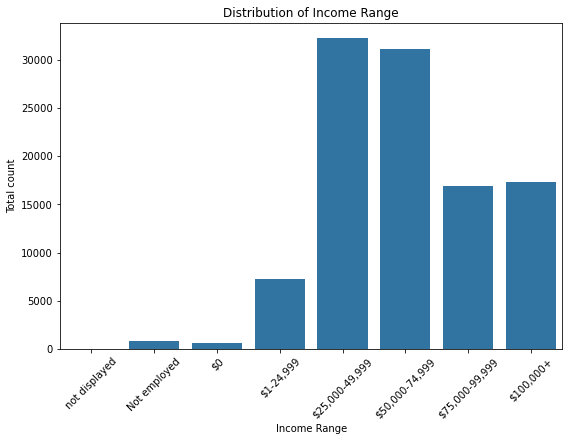

In [5]:
# Creating a barchart to show the distribution of IncomeRange 
plt.figure(figsize = [9, 6])
color_pal = sb.color_palette()[0]
order_type = ['not displayed', 'Not employed', '$0', '$1-24,999', '$25,000-49,999', 
              '$50,000-74,999','$75,000-99,999', '$100,000+']
sb.countplot(data= loan_subset, x = 'IncomeRange', color = color_pal, order = order_type)
plt.title("Distribution of Income Range")
plt.xlabel("Income Range")
plt.ylabel("Total count")
plt.xticks(rotation = 45);

## Distribution of Stated Monthly Income
From the data displayed, it shows that the distribution of stated monthly income is right-skewed. in which most stated monthly income are less than 30k.

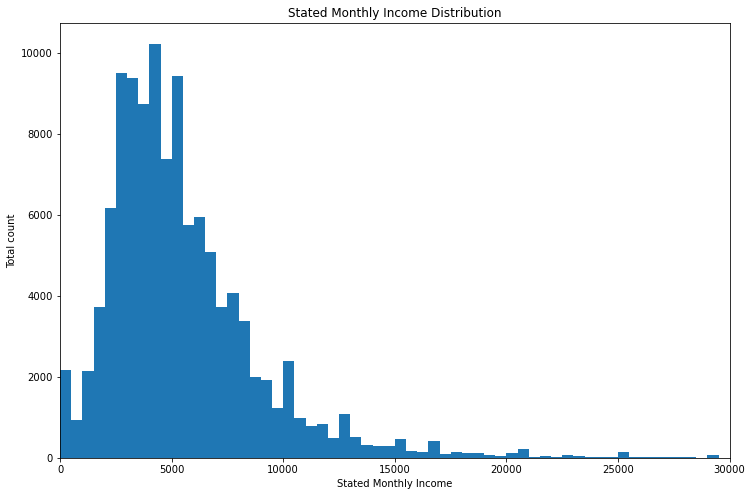

In [6]:
# creating a Histogram to show the Stated Monthly Income the Borrower
plt.figure(figsize = [12, 8])
bin_edges= np.arange(0, loan_subset['StatedMonthlyIncome'].max()+500, 500)
plt.hist(data= loan_subset, x = 'StatedMonthlyIncome', bins= bin_edges)
plt.xlim(0, 30000)
plt.xlabel('Stated Monthly Income')
plt.ylabel('Total count')
plt.title('Stated Monthly Income Distribution');

## Distribution of Borrower APR

From the distribution it shows that the peak was at 0.2. afterward, it goes on a downward trend with a peak at 0.3 and a sudden rise at 0.35.

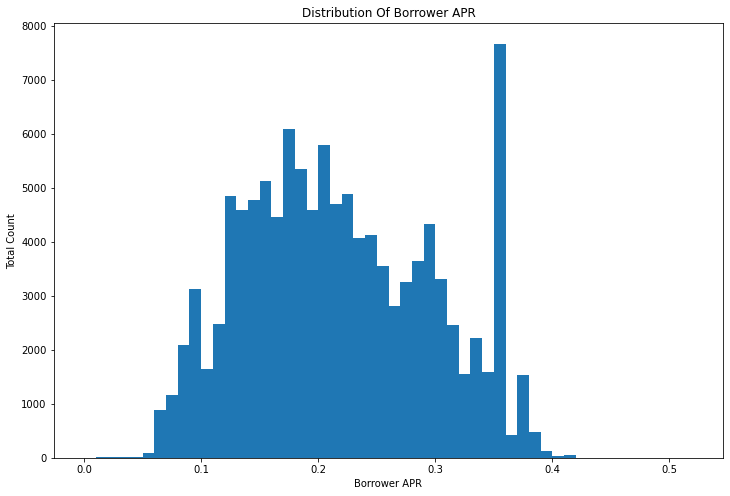

In [7]:
# creating a histogram to show the distribution of the borrowers APR
plt.figure(figsize = [12, 8])
bin_edge = np.arange(0, loan_subset.BorrowerAPR.max() + 0.01, 0.01)
plt.hist(data = loan_subset, x = 'BorrowerAPR', bins = bin_edge)
plt.xlabel('Borrower APR')
plt.ylabel('Total Count')
plt.title('Distribution Of Borrower APR');

## Correlation Between Loan Original Amount, Stated Monthly Income, and Borrower Rate
From the heatmap it shows that Loan original amount and borrowers rate are nagatively correleted with a value of - 0.33 this indicated that the higer the borrower original amount the lowre the borrower rate on the loan.
It also reveal that stated monthly income and loan original amount were positively correlated with a value point of 0.20 this indicated that the the higer the monthly income stated by the borrower the higher the loan gotten.
However there is a low and nagative The correlation between stated monthly income and borrower rate with a value of -0.09.

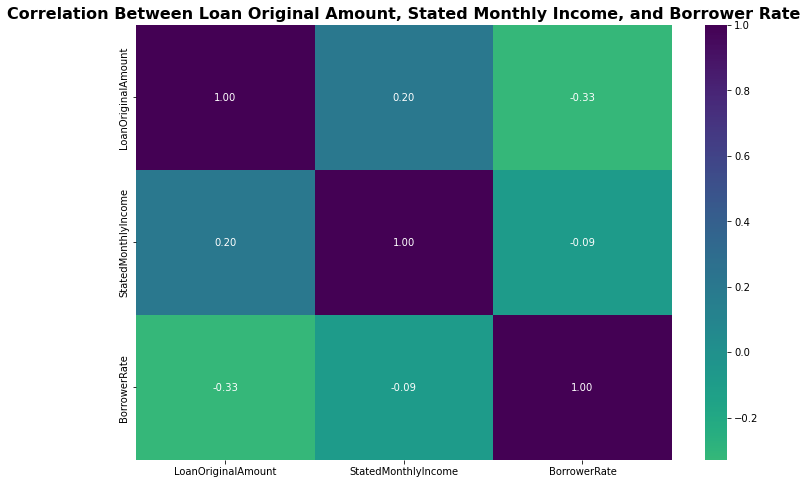

In [8]:
# creating a numeric variables
numeric_vars = [ 'LoanOriginalAmount','StatedMonthlyIncome', 'BorrowerRate']
# showing correlation using a heatmap plot
plt.figure(figsize = [12, 8])
sb.heatmap(loan_subset[numeric_vars].corr(), annot = True, fmt = '.2f',
           cmap = 'viridis_r', center = 0)
plt.title('Correlation Between Loan Original Amount, Stated Monthly Income, and Borrower Rate', 
          fontsize = 16, fontweight = 'bold');

## Correlation between Borrower's Interest Rate and Loan Original Amount
Investigating further to see the correlation between borrower interest rate and their loan original amount, the chart shows that at different size of the loan amount, the BorrowerRate has a large range, but the range of BorrowerRate decrease with the increase of loan amount. That is, borrowers who borrowed higher loan amount had lesser interest rate

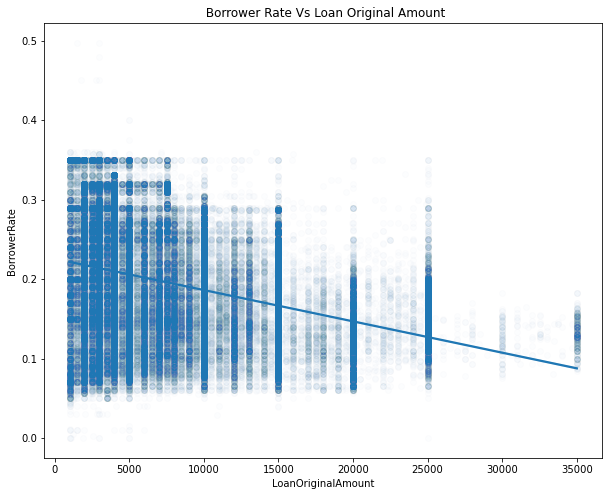

In [9]:
# looking at how borrowerRate and loan original amount are related to one another for all of the data
plt.figure(figsize = [10, 8])
sb.regplot(data = loan_subset, x = 'LoanOriginalAmount', y = 'BorrowerRate', scatter_kws={'alpha':0.01})
plt.title(' Borrower Rate Vs Loan Original Amount');

## Income Range vs Loan Amount by Verifiable Income
The data shows that those who earn 100,000+ and have verified their income tend to get larger loan original amount than those whose income are not verifiable. The borrowers with verified incomes tend to get higher loan amounts.

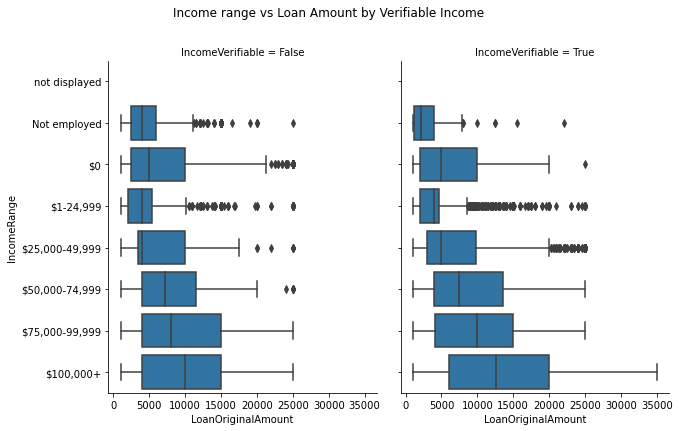

In [10]:
# investigating the effect a verified income has on the relationship between loan original amount and income range
order = ['not displayed', 'Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999','$75,000-99,999', '$100,000+']
box= sb.FacetGrid(data= loan_subset, col = 'IncomeVerifiable', height = 4)
box.map(sb.boxplot, 'LoanOriginalAmount', 'IncomeRange', order = order)
plt.suptitle('Income range vs Loan Amount by Verifiable Income', y = 1.04)
box.fig.set_size_inches(10,6);

In [11]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 914445 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\isaac\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\isaac\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\isaac\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\isaac\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 346, in start
    self.convert_notebooks()
  File "C:\Users\isaac\anaconda3\lib\site-packages\